In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import re
import string
import unicodedata
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import langid
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vassi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2> Read data

In order to download the preprocessed data 'Chat.csv', follow the link: https://drive.google.com/drive/folders/1sO6xOJPaK49hO8vVnEilTWbj84Ga7qc6?usp=sharing

In [2]:
location = 'C:/Users/vassi/Desktop/'
# df = pd.read_csv(location+'chatlogs.csv')

<h2> Preprocessing

In [3]:
def text_preprocessing(text):
    print(text)
    # Remove '@name' and urls
    text = re.sub(r'(@.*?)[\s]', ' ', text)
    text = re.sub(r'(http.*)', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def remove_stopwords(text):
    sw_nltk = stopwords.words('english')
    sw_nltk.append('st')
    sw_nltk.append('nd')
    sw_nltk.append('rd')
    sw_nltk.append('th')
    sw_nltk.append('rt')
    words = [word for word in text.split() if word.lower() not in sw_nltk]
    new_text = " ".join(words)
    return new_text

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = ''.join(i for i in text if not i.isdigit())
    return text

In [4]:
# # delete nan messages and clean the messages

# df=df[~df['message'].isna()]
# df['message']=df['message'].apply(lambda x : clean_text(x))
# df['language'] = df['message'].apply(lambda x: langid.classify(x) if x is not ['', ' '] else np.nan)
# df[['language', 'language_certainty']] = pd.DataFrame(df['language'].tolist(), index=df.index)
# df = df[df['language'] == 'en']

# #remove empty comments and stopwords
# df = df[~df['message'].isin(['', ' ', np.nan, None, []])]
# df['message']=df['message'].apply(lambda x : remove_stopwords(x))

# #remove empty comments after the removal of stopwords
# df = df[~df['message'].isin(['', ' ', np.nan, None, []])]
# # df.to_csv(location+'Chat.csv')

In [14]:
df = pd.read_csv(location+'Chat.csv')

<h2> Data Statistics

In [15]:
###split data into train develop and test set. 

train, test = train_test_split(df, test_size=0.2)
train, dev = train_test_split(train, test_size=0.25)

In [7]:
print('There are nan values in train set \n', train.isnull().any())
print('There are nan values in dev set \n', dev.isnull().any())
print('There are nan values in test set \n', test.isnull().any())

There are nan values in train set 
 Unnamed: 0                   False
Unnamed: 0.1                 False
Unnamed: 0.1.1               False
message                      False
association_to_offender       True
time                         False
case_total_reports           False
allied_report_count          False
enemy_report_count           False
most_common_report_reason    False
chatlog_id                   False
champion_name                 True
language                     False
language_certainty           False
dtype: bool
There are nan values in dev set 
 Unnamed: 0                   False
Unnamed: 0.1                 False
Unnamed: 0.1.1               False
message                      False
association_to_offender       True
time                         False
case_total_reports           False
allied_report_count          False
enemy_report_count           False
most_common_report_reason    False
chatlog_id                   False
champion_name                 True
language

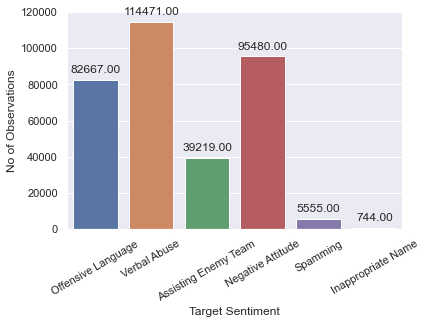

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="darkgrid")
splot = sns.countplot(x='most_common_report_reason', data=train)

splot.set(xlabel='Target Sentiment', ylabel='No of Observations')
splot.set_xticklabels(splot.get_xticklabels(), rotation=30)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    

<h2> Tokenization

In [16]:
train['message_text'] = train['message'].apply(lambda x: x.split(" "))
train['count'] = train['message_text'].apply(lambda x: len(x))

dev['message_text'] = dev['message'].apply(lambda x: x.split(" "))
dev['count'] = dev['message_text'].apply(lambda x: len(x))

test['message_text'] = test['message'].apply(lambda x: x.split(" "))
test['count'] = test['message_text'].apply(lambda x: len(x))

In [9]:
sns.countplot(train['count'])
plt.xticks(rotation=70)
plt.tight_layout()

NameError: name 'sns' is not defined

C:\Users\vassi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


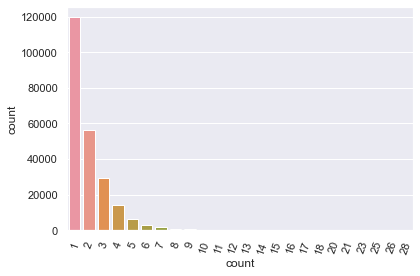

In [14]:
sns.countplot(dev['count'])
plt.xticks(rotation=70)
plt.tight_layout()

C:\Users\vassi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


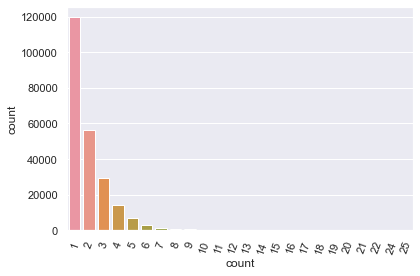

In [15]:
sns.countplot(test['count'])
plt.xticks(rotation=70)
plt.tight_layout()

In [11]:
# remove short chat messages

train = train[train['count']!=1]
dev = dev[dev['count']!=1]
test = test[test['count']!=1]

In [17]:
train['most_common_report_reason'].unique()

array(['Negative Attitude', 'Verbal Abuse', 'Spamming',
       'Assisting Enemy Team', 'Offensive Language', 'Inappropriate Name'],
      dtype=object)

In [13]:
# concatenate similar classes and drop the 'assisting enemy team' category

train['most_common_report_reason'] = train['most_common_report_reason'].apply(lambda x: 'Offensive Language' if x == 'Inappropriate Name' else 'Negative Attitude' if x == 'Spamming' else x)
dev['most_common_report_reason'] = dev['most_common_report_reason'].apply(lambda x: 'Offensive Language' if x == 'Inappropriate Name' else 'Negative Attitude' if x == 'Spamming' else x)
test['most_common_report_reason'] = test['most_common_report_reason'].apply(lambda x: 'Offensive Language' if x == 'Inappropriate Name' else 'Negative Attitude' if x == 'Spamming' else x)

train = train[train['most_common_report_reason']!='Assisting Enemy Team']
dev = dev[dev['most_common_report_reason']!='Assisting Enemy Team']
test = test[test['most_common_report_reason']!='Assisting Enemy Team']

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer


X_train = train['message']
y_train = pd.get_dummies(train['most_common_report_reason'])

X_dev = dev['message']
y_dev = pd.get_dummies(dev['most_common_report_reason'])

X_test = test['message']
y_test = pd.get_dummies(test['most_common_report_reason'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [42]:
from gensim.models import Word2Vec

Embedding_dimensions = 30

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [43]:
%%time

# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.index_to_key))

Vocabulary Length: 8338
Wall time: 6.06 s


In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = tokenizer.texts_to_sequences(X_train)
X_dev = tokenizer.texts_to_sequences(X_dev)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train)
X_dev = pad_sequences(X_dev, maxlen = X_train.shape[1])
X_test = pad_sequences(X_test, maxlen = X_train.shape[1])

In [45]:
embedding_matrix = np.zeros((len(word_index) + 1, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (53030, 30)


<h2> Create different models

<h4> Create embedding matrix for the neural network

In [48]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional, Dense, LSTM, Dropout, Embedding, Conv1D, GlobalMaxPool1D

def createModel(word_index,X_train,layer,drop,lr):
    
    embedding_layer = Embedding(input_dim = len(word_index) + 1, 
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix], 
                                input_length=X_train.shape[1],
                                trainable=False)
    
#     model = tf.keras.Sequential()
#     model.add(embedding_layer)
#     model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(layer, return_sequences=False)))
# #     model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(layer, return_sequences=False)))
#     model.add(tf.keras.layers.Dropout(drop))
# #     model.add(Dense(64,activation = 'relu'))
#     model.add(tf.keras.layers.Dense(6, activation='softmax'))

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(8, dropout=drop, return_sequences=True)),
        Bidirectional(LSTM(8, dropout=drop, return_sequences=True)),
        Conv1D(8, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(6, activation='softmax'),
    ],
    name="Sentiment_Model")
    
    model.compile(loss='categorical_crossentropy', 
             optimizer='rmsprop', 
             metrics=['accuracy', 'Precision', 'Recall'])
    
    return model

In [49]:
final=[]
import random
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
# from tensorflow.keras.callbacks import EarlyStopping

class_weights= class_weight.compute_class_weight('balanced',classes=list(train['most_common_report_reason'].unique()),y=train['most_common_report_reason'])
weights = {0 : class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3],4: class_weights[4], 5: class_weights[5]}
dropouts = np.arange(0.1,0.5,0.1).tolist()
lrs= np.arange(0.01,0.1,0.01).tolist()
layers=np.arange(4,64,1).tolist()
for _ in range(30):
    drop = random.choice(dropouts)
    lr = random.choice(lrs)
    layer = random.choice(layers)
    print(drop, lr, layer)
    
    model=createModel(word_index,X_train,layer,drop,lr)
    # callback = EarlyStopping(monitor='loss', patience=3)
    history = model.fit(X_train,y_train,epochs = 3, batch_size=64, verbose = 1, class_weight = weights,validation_split = 0.2)
    
    predictions = model.predict(X_dev)
    predictions=list(predictions.argmax(axis=1))
    
    y_test_new=np.array(y_dev)
    y_test_new=list(y_test_new.argmax(axis=1))
    
    
    final.append([layer,drop,lr,accuracy_score(predictions,y_test_new)])

0.30000000000000004 0.01 16
Epoch 1/3
8707/8707 [==============================] - 172s 20ms/step - loss: 11.6657 - accuracy: 0.3367 - precision: 0.3368 - recall: 0.3353 - val_loss: 2.6576 - val_accuracy: 0.3381 - val_precision: 0.3381 - val_recall: 0.3381
Epoch 2/3
8707/8707 [==============================] - 167s 19ms/step - loss: 11.5433 - accuracy: 0.3368 - precision: 0.3368 - recall: 0.3368 - val_loss: 2.4092 - val_accuracy: 0.3381 - val_precision: 0.3381 - val_recall: 0.3381
Epoch 3/3
8707/8707 [==============================] - 172s 20ms/step - loss: 11.5432 - accuracy: 0.3368 - precision: 0.3368 - recall: 0.3368 - val_loss: 2.6482 - val_accuracy: 0.3381 - val_precision: 0.3381 - val_recall: 0.3381
0.1 0.02 34
Epoch 1/3
5644/8707 [==================>...........] - ETA: 59s - loss: 11.6914 - accuracy: 0.3368 - precision: 0.3368 - recall: 0.3357

KeyboardInterrupt: 

In [ ]:
final = pd.DataFrame(final,columns=['layer','drop','lr','accuracy_score'])
final.to_csv('results_tm.csv')

In [173]:
final.loc[final['accuracy_score']==final['accuracy_score'].max()]

,layer,drop,lr,accuracy_score
0,68,0.3,0.001,0.517616


In [174]:
model = createModel(word_index,X_train,68,0.3,0.001)
history = model.fit(X_train,y_train,epochs = 3, batch_size=64, verbose = 1,class_weight = weights,validation_split = 0.2)


Epoch 1/3
201/201 [==============================] - 74s 314ms/step - loss: 1.0103 - accuracy: 0.4469 - precision: 0.6434 - recall: 0.1361 - val_loss: 0.9284 - val_accuracy: 0.5524 - val_precision: 0.7076 - val_recall: 0.2371
Epoch 2/3
201/201 [==============================] - 66s 327ms/step - loss: 0.6835 - accuracy: 0.7034 - precision: 0.7571 - recall: 0.5897 - val_loss: 0.9308 - val_accuracy: 0.5839 - val_precision: 0.6297 - val_recall: 0.4604
Epoch 3/3
201/201 [==============================] - 65s 325ms/step - loss: 0.3852 - accuracy: 0.8416 - precision: 0.8673 - recall: 0.8089 - val_loss: 1.0795 - val_accuracy: 0.5914 - val_precision: 0.6119 - val_recall: 0.5356


In [175]:
pred = model.predict(X_test)
pred=list(pred.argmax(axis=1))
y_test = np.array(y_test).argmax(axis=1)
print(classification_report(y_test, pred, target_names=list(train['sentiment'].unique())))

              precision    recall  f1-score   support

    negative       0.38      0.38      0.38      4155
     neutral       0.60      0.58      0.59     12842
    positive       0.57      0.59      0.58      9572

    accuracy                           0.55     26569
   macro avg       0.51      0.52      0.52     26569
weighted avg       0.55      0.55      0.55     26569



In [176]:
from sklearn.metrics import confusion_matrix

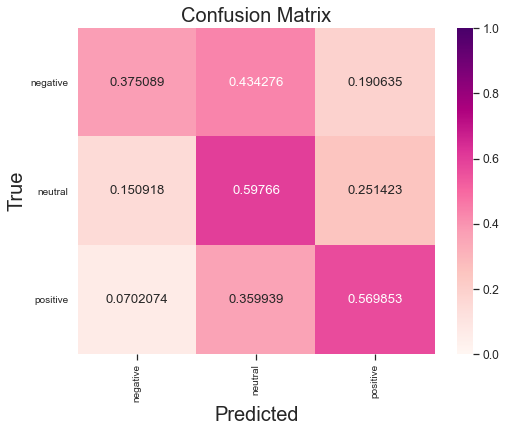

In [177]:
cm2=confusion_matrix(pred,y_test)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(8, 6))
ax= plt.subplot()
cm1 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm1, annot=True, ax = ax, fmt = 'g',cmap='RdPu',vmax=1,vmin=0); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels([ 'negative' , 'neutral'  , 'positive'], fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels([ 'negative' , 'neutral' , 'positive'], fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)


plt.show()

In [118]:
final['Layer-drop_value-learning_rate'] =final[['layer','drop','lr']].apply(lambda row : str(int(row['layer'])) +'-' + str(np.round(row['drop'],2))+'-'+str(np.round(row['lr'],3)),axis=1)

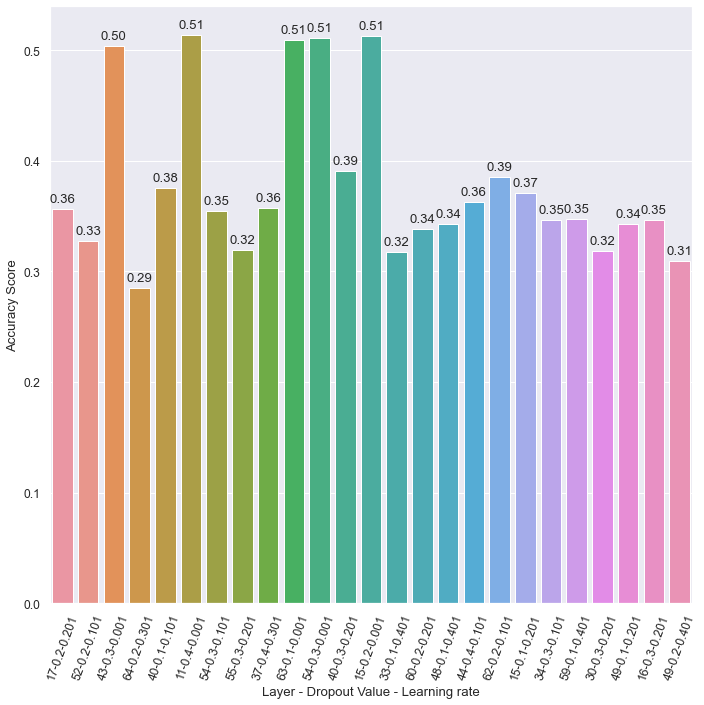

In [148]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 1.1)
ax=sns.barplot(x='Layer-drop_value-learning_rate',y='accuracy_score',data=final)

ax.set(xlabel='Layer - Dropout Value - Learning rate',ylabel = 'Accuracy Score')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=70)
plt.tight_layout()

<h2> Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2]
best = 0
for i in range(25):
    n = random.randint(32, 128)
    spl = random.choice(min_samples_split)
    lea = random.choice(min_samples_leaf)
    ran = RandomForestClassifier(class_weight='balanced', n_estimators=n, min_samples_split=spl, min_samples_leaf=lea)
    model = ran.fit(X_train, y_train)
    preds = model.predict(X_dev)
    acc = accuracy_score(y_dev, preds)
    if acc > best:
        best = acc
        best_vals = [n, spl, lea]
#     print(i)
ran = RandomForestClassifier(class_weight='balanced', n_estimators=best_vals[0], min_samples_split=best_vals[1], min_samples_leaf=best_vals[2])
model = ran.fit(X_train, y_train)
ran_preds = model.predict(X_test)
print(classification_report(y_test, ran_preds, target_names=list(train['sentiment'].unique())))
print(best_vals)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
              precision    recall  f1-score   support

    negative       0.44      0.00      0.00      4155
     neutral       0.54      0.30      0.39     12842
    positive       0.45      0.33      0.38      9572

   micro avg       0.50      0.27      0.35     26569
   macro avg       0.48      0.21      0.26     26569
weighted avg       0.49      0.27      0.33     26569
 samples avg       0.27      0.27      0.27     26569



C:\Users\markf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2> Support Vector Classifier 

In [48]:
classes = list(train['most_common_report_reason'].unique())


,Assisting Enemy Team,Inappropriate Name,Negative Attitude,Offensive Language,Spamming,Verbal Abuse
1116596,0,0,0,0,0,1
1169623,0,0,0,1,0,0
986645,0,0,0,0,0,1
1078407,0,0,0,0,0,1
466920,0,0,0,1,0,0
...,...,...,...,...,...,...
847107,0,0,0,1,0,0
1136492,0,0,1,0,0,0
115380,0,0,0,1,0,0
192057,0,0,0,0,0,1


In [9]:
from sklearn.svm import SVC
import random
from sklearn.metrics import accuracy_score, classification_report

kernel = ['rbf', 'poly', 'sigmoid']
gamma = ['scale', 'auto']
best = 0
for i in range(25):
    c = np.random.uniform(0.1, 2)
    ker = random.choice(kernel)
    gam = random.choice(gamma)
    svc = SVC(class_weight='balanced', C=c, kernel=ker, gamma=gam, max_iter=5000)
    model = svc.fit(X_train,  train['most_common_report_reason'])
    preds = model.predict(X_dev)
    acc = accuracy_score(dev['most_common_report_reason'], preds)
    if acc > best:
        best = acc
        best_vals = [c, ker, gam]
svc = SVC(class_weight='balanced', C=best_vals[0], kernel=best_vals[1], gamma=best_vals[2], max_iter=5000)
model = svc.fit(X_train, train['most_common_report_reason'])
svc_preds = model.predict(X_test)
print(classification_report(test['most_common_report_reason'], svc_preds, target_names=list(train['most_common_report_reason'].unique())))
print(best_vals)

C:\Users\vassi\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vassi\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vassi\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vassi\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\vassi\AppData\Roaming\Python\Python38\site-

KeyboardInterrupt: 